## Imports

In [14]:
%cd ".\Documents\GitHub\pan-clef-2024\pan-clef-2024-oppositional-main"

C:\Users\Nadia Timoleon\Documents\GitHub\pan-clef-2024\pan-clef-2024-oppositional-main


In [3]:
from data_tools.dataset_loaders import (
    load_dataset_full,
    load_dataset_split,
    calculate_json_dataset_stats,
    split_train_set
)

## Splitting the data

In [4]:
# English dataset
split_train_set('en', rndm_seed=1004)
# Spanish dataset
split_train_set('es', rndm_seed=3)

## Statistics

In [5]:
ds_en_train_full = load_dataset_full(lang='en', format='json')
ds_es_train_full = load_dataset_full(lang='es', format='json')
ds_en_train, ds_en_dev = load_dataset_split(lang='en', format='json')
ds_es_train, ds_es_dev = load_dataset_split(lang='es', format='json')

Loading official JSON en dataset
Loading official JSON es dataset
Loading train and dev JSON en dataset
Loading train and dev JSON es dataset


### Original train data

In [6]:
# broken? does not filter by label
# calculate_json_dataset_stats(ds_en_train_full, label='critical')
calculate_json_dataset_stats(ds_en_train_full)

Number of documents: 4000
CRITICAL: 65.525% ; CONSPIRACY: 34.475%
AGENT: 51.200% ; CAMPAIGNER: 54.850% ; FACILITATOR: 26.500% ; NEGATIVE_EFFECT: 48.275% ; OBJECTIVE: 22.450% ; VICTIM: 42.675% ; X: 5.150%



In [7]:
calculate_json_dataset_stats(ds_es_train_full)

Number of documents: 4000
CRITICAL: 63.450% ; CONSPIRACY: 36.550%
AGENT: 25.525% ; CAMPAIGNER: 35.925% ; FACILITATOR: 26.475% ; NEGATIVE_EFFECT: 48.525% ; OBJECTIVE: 8.450% ; VICTIM: 50.100% ; X: 8.500%



### Train-dev split data

In [8]:
calculate_json_dataset_stats(ds_en_train)

Number of documents: 3600
CRITICAL: 65.972% ; CONSPIRACY: 34.028%
AGENT: 51.194% ; CAMPAIGNER: 54.639% ; FACILITATOR: 26.361% ; NEGATIVE_EFFECT: 48.194% ; OBJECTIVE: 22.250% ; VICTIM: 42.583% ; X: 5.361%



In [9]:
calculate_json_dataset_stats(ds_en_dev)

Number of documents: 400
CRITICAL: 61.500% ; CONSPIRACY: 38.500%
AGENT: 51.250% ; CAMPAIGNER: 56.750% ; FACILITATOR: 27.750% ; NEGATIVE_EFFECT: 49.000% ; OBJECTIVE: 24.250% ; VICTIM: 43.500% ; X: 3.250%



In [10]:
calculate_json_dataset_stats(ds_es_train)

Number of documents: 3600
CRITICAL: 63.694% ; CONSPIRACY: 36.306%
AGENT: 25.611% ; CAMPAIGNER: 35.778% ; FACILITATOR: 26.361% ; NEGATIVE_EFFECT: 48.611% ; OBJECTIVE: 8.333% ; VICTIM: 50.833% ; X: 8.389%



In [11]:
calculate_json_dataset_stats(ds_es_dev)

Number of documents: 400
CRITICAL: 61.250% ; CONSPIRACY: 38.750%
AGENT: 24.750% ; CAMPAIGNER: 37.250% ; FACILITATOR: 27.500% ; NEGATIVE_EFFECT: 47.750% ; OBJECTIVE: 9.500% ; VICTIM: 43.500% ; X: 9.500%



## Our Statistics

In [1]:
# We will work with pandas dataframes for ease of use

import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt

In [2]:
%cd

C:\Users\Nadia Timoleon


In [3]:
def load_pickle_to_df(data_name):
  pickle_path = "./Documents/GitHub/pan-clef-2024/data/pickle/"
  data_path = os.path.join(pickle_path, data_name)
  df = pd.read_pickle(data_path)
  df = df[['id', 'text']].copy() # select only the 'id' and 'text' columns
  #df.set_index('id', inplace=True) # set 'id' column as index
  return df

# statistics functions
def add_sequence_info(df):
  # Calculate sequence length
  df['sequence_length'] = df['text'].apply(len)
  return df

def print_size_stats(df):
  mean_length = np.mean(df['sequence_length'])
  std_length = np.std(df['sequence_length'])
  min_length = np.min(df['sequence_length'])
  max_length = np.max(df['sequence_length'])
  print(f"Mean sequence length: {mean_length:.2f}")
  print(f"Standard deviation of sequence length: {std_length:.2f}")
  print(f"Min sequence length: {min_length}")
  print(f"Max sequence length: {max_length}")

def statistics_summary(data_name):
  df = load_pickle_to_df(data_name)
  df = add_sequence_info(df)
  print(f"Data file: {data_name}")
  print("-----------------------")
  print_size_stats(df)
  return df

### English data

In [4]:
df_en_train = statistics_summary('dataset_en_train.pkl')

Data file: dataset_en_train.pkl
-----------------------
Mean sequence length: 568.03
Standard deviation of sequence length: 596.27
Min sequence length: 78
Max sequence length: 4695


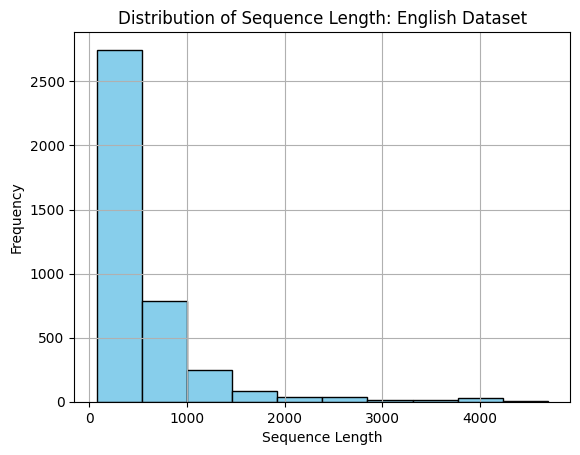

In [5]:
plt.hist(df_en_train['sequence_length'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.title('Distribution of Sequence Length: English Dataset')
plt.grid(True)
plt.show()

In [6]:
# find an average-length sequence
df_en_train[(df_en_train['sequence_length'] >= 558) & (df_en_train['sequence_length'] <= 578)].sample(1)

,id,text,sequence_length
3668,6542,"We 're really not on the cusp of the "" elites ...",576


### Spanish data

In [7]:
df_es_train = statistics_summary('dataset_es_train.pkl')

Data file: dataset_es_train.pkl
-----------------------
Mean sequence length: 813.31
Standard deviation of sequence length: 768.00
Min sequence length: 99
Max sequence length: 4761


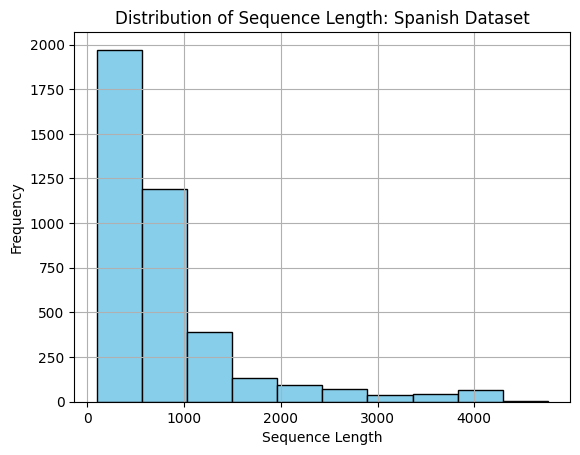

In [8]:
plt.hist(df_es_train['sequence_length'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.title('Distribution of Sequence Length: Spanish Dataset')
plt.grid(True)
plt.show()

In [9]:
# find an average-length sequence
df_es_train[
    (df_es_train['sequence_length'] >= 803) & (df_es_train['sequence_length'] <= 823)
  ].sample(1)

,id,text,sequence_length
3981,3957,El primer brote global de viruela del mono ocu...,813


In [17]:
# find sequences with length larger than mean + std
df_es_train[
    df_es_train['sequence_length'] > np.mean(df_es_train['sequence_length']) + np.std(df_es_train['sequence_length'])
  ].sample(1)

,id,text,sequence_length
2254,1334,Ya decía antes que no se podía sacar este tema...,2158


In [28]:
# find sequences with length 4000 +- 100
df_es_train[
    (df_es_train['sequence_length'] >= 2050) & (df_es_train['sequence_length'] <= 2200)
  ].sample(1)

,id,text,sequence_length
736,1576,ATENCIÓN LO QUE VIENE ... Después del 30 d...,2188
